In [9]:
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp
from matplotlib.colors import ListedColormap
import math

In [10]:
def Tobs(nside:int, ipix:int) -> float:
    """ Calcula a temperatura media por um observador
        em movimento em relacao a CMB
        
        ARGS:
            nside: resolucao do mapa
            ipix: coordenada do pixel no mapa com resolucao nside
            
        RETURN:
            Temperatura (K)
    """
    
    beta = 371.0/300e3 #v/c  v=371km/s nossa velocidade 
    Tcmb = 2.725       #K Temperatura da CMB
    
    #Angulo entre o pixel e a direcao do nosso movimento em relacao a CMB
    theta, phi = hp.pix2ang(nside, ipix)
    angulo = hp.rotator.angdist([theta, phi], np.radians([48.25, 263.55]))
    
    # Alteracao na temperatura pelo efeito Doppler
    x = Tcmb * math.sqrt(1-beta*beta)/(1-beta*math.cos(angulo))
    
    return x

In [11]:
colombi1_map = ListedColormap(np.loadtxt('planckrgb.txt')/255.)
colombi1_map.set_bad('gray')
colombi1_map.set_under('white')
cmap = colombi1_map

In [12]:
dpi = 30
figsize_inch = 30, 20
fig = plt.figure(figsize=figsize_inch, dpi=dpi)

In [17]:
nside = 32
npix = hp.nside2npix(nside)
print(f'Resolucao angular: {np.degrees(hp.nside2npix(nside))}')
print(f'Pixeis no mapa: {np.degrees(hp.nside2resol(nside))}')

Resolucao angular: 704050.5386567556
Pixeis no mapa: 1.8322594196359498


In [18]:
m = np.zeros(npix)
for i in range(npix):
    m[i] = Tobs(nside, i)

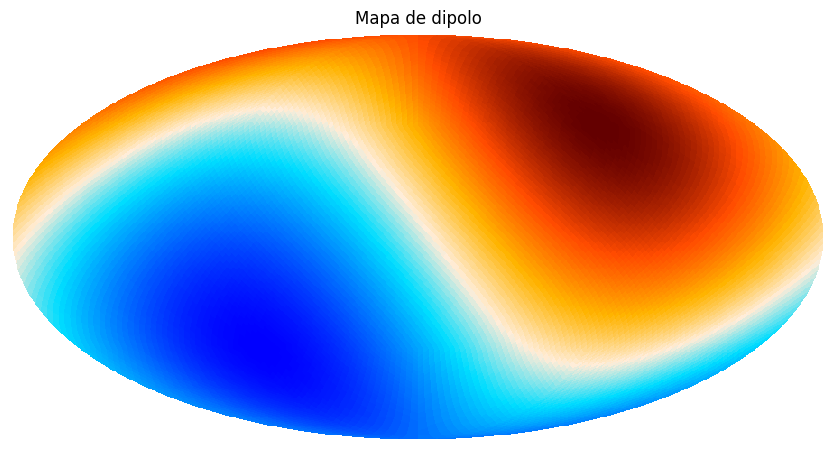

In [20]:
hp.mollview(m, fig=fig.number, xsize=figsize_inch[0]*dpi, title='Mapa de dipolo', cbar=False, cmap=cmap)
plt.show()